In [1]:
#importing all necessary libraries
#importing pyforest imports pandas, dask, numpy, sklearn and matplotlib
import seaborn as sns
import numpy as np
import pyforest
import seaborn as sns

In [2]:
#use pandas to read the file
df = pd.read_csv("IT Salary Survey EU  2020.csv")
#finding the number of rows and columns using .shape
df.shape

<IPython.core.display.Javascript object>

(1253, 23)

In [3]:
#One of the most important things is to take a closer look at the propertis of the data
#to take closer look of the data we use .head to find the first 5 observations of the data 

df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [4]:
#use .tail to find the last 5 observations of the data
df.tail()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",...,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,...,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",...,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",...,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,NaN,0
1252,19/01/2021 12:01:11,26.0,Male,Berlin,DevOps,2,2,Middle,yaml,"Python, AWS, Kubernetes, Docker, terraform, an...",...,0,30,Full-time employee,Unlimited contract,English,51-100,Startup,No,30.0,600


In [5]:
#Find out the columns and the corresponding data types and find out whether there are null values 
#the data types help discover the analysis to be done to uncover insights.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [6]:
#Find the summary of stastics of various columns
df.describe()

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
count,1226.000000,1.253000e+03,8.850000e+02,373.000000
mean,32.509788,8.027904e+07,6.322459e+05,12.967828
std,5.663804,2.825061e+09,1.680508e+07,15.275174
min,20.000000,1.000100e+04,1.100000e+04,0.000000
25%,29.000000,5.880000e+04,5.500000e+04,0.000000
50%,32.000000,7.000000e+04,6.500000e+04,0.000000
75%,35.000000,8.000000e+04,7.500000e+04,30.000000
max,69.000000,1.000000e+11,5.000000e+08,40.000000


In [7]:
# Sum NaN values in each column
df.isna().sum()



Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

In [36]:
# Deleting unneeded columns 
del df['Years of experience in Germany']
del df['Other technologies/programming languages you use often']
del df['Employment status']
del df['Сontract duration']

In [8]:
#Now we Explore the Data.
#We check basic features of the Survey Participants of the Survey.
#We will Look at features such as Age, Gender, Cities they come from.

In [9]:
#Age of The Survey of participants.
#We use the .describe function to analyze a column
df["Age"].describe()

count    1226.000000
mean       32.509788
std         5.663804
min        20.000000
25%        29.000000
50%        32.000000
75%        35.000000
max        69.000000
Name: Age, dtype: float64

In [10]:

#Output the age array using the unique function to avoid repetition.
df["Age"].unique()

array([26., 29., 28., 37., 32., 24., 35., nan, 34., 31., 41., 27., 25.,
       59., 36., 38., 40., 39., 33., 30., 49., 48., 44., 66., 45., 43.,
       42., 46., 47., 56., 53., 65., 22., 23., 50., 51., 21., 20., 54.,
       69., 52.])

In [11]:
#Find the count of each age
df["Age"].value_counts().head(15)

30.0    110
33.0     94
32.0     94
28.0     87
31.0     87
29.0     86
35.0     82
34.0     74
36.0     60
26.0     59
27.0     58
38.0     48
37.0     44
25.0     42
40.0     31
Name: Age, dtype: int64

In [12]:
#to find the number of unique elements
df["Age"].nunique()

40

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

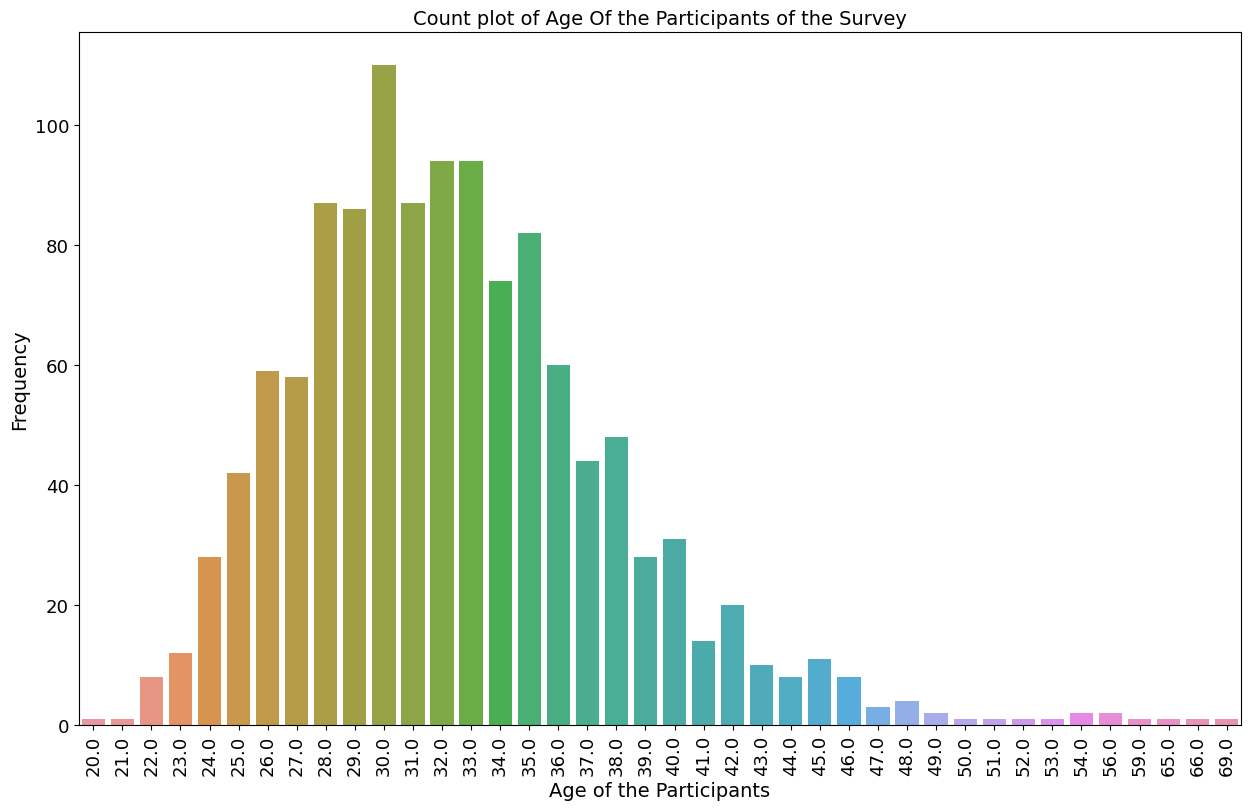

In [13]:
#we can use a count plot to visualize the number of participants in each age.

#Size Of the Figure
plt.figure(figsize=(15,9))
# Create count plot
sns.countplot(x='Age', data=df)

# Set plot title and axes labels
plt.title('Count plot of Age Of the Participants of the Survey',fontsize=14)
plt.xticks(fontsize = 13, rotation = 90)
plt.xlabel('Age of the Participants', fontsize=14)
plt.yticks(fontsize = 13)
plt.ylabel('Frequency',fontsize=14)

# Show plot
plt.show()

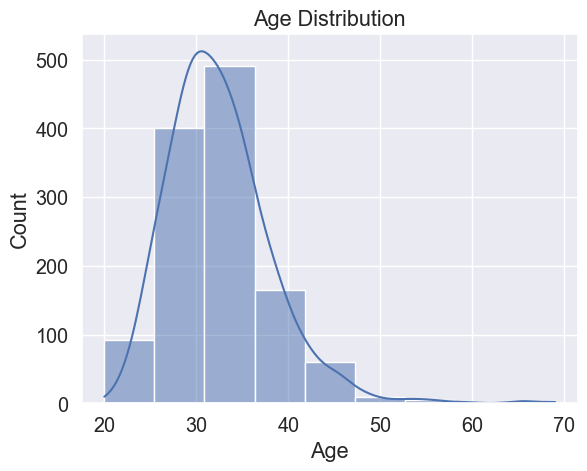

Age Descriptive Statistics


count    1226.0
mean       33.0
std         6.0
min        20.0
25%        29.0
50%        32.0
75%        35.0
max        69.0
Name: Age, dtype: float64

In [40]:
#Histogram: they summarize the the distributin of the data

sns.set(font_scale=1.3)
plot=sns.histplot(df.Age,bins=9,kde=True)
plt.title('Age Distribution')
plt.show()

print('Age Descriptive Statistics')
df['Age'].describe().round()


In [15]:
#Find the cities from where the participants are from

df["City"].unique()

array(['Munich', 'Berlin', 'Hamburg', 'Wolfsburg', 'Stuttgart',
       'Schleswig-Holstein', 'London', 'Konstanz area', 'Frankfurt',
       'Cologne', 'Kempten', 'Münster', 'Erlangen', 'Vienna', 'Moldova',
       'Rosenheim', 'Mannheim ', 'Boeblingen', 'Düsseldorf', 'Ingolstadt',
       'Nürnberg', 'Ansbach', 'Leipzig', 'Mannheim', 'Tuttlingen', 'Bonn',
       'Moscow', 'Koblenz', 'Warsaw', 'Heidelberg', 'Karlsruhe', 'Köln',
       'Aachen', 'Karlsruhe ', 'Samara', 'Riga, Latvia', 'Dusseldorf',
       'Zurich', 'Helsinki', 'Würzburg', 'Kiev', 'Den Haag', 'Amsterdam',
       'Cracovia', 'Tallinn', 'Prague', 'Utrecht', 'Stockholm',
       'Braunschweig ', 'Dresden', 'Kyiv', 'Stuttgart ', 'Malta',
       'Lübeck', 'Nuremberg ', 'Bodensee', 'Milan', 'Salzburg', 'Rome',
       'Wroclaw', 'Cupertino', 'Paris', 'Dublin ', 'Paderborn',
       'Konstanz', 'Ulm', 'Düsseldorf ', 'Barcelona', 'Bölingen',
       'Tampere (Finland)', 'Hannover', 'Bucharest', 'Siegen', 'Minsk',
       'Nuremberg', 'M

In [16]:
#Let us investigate the cities with participants
#After running the cell we can see there are 119 cities from where the survey wa t
df["City"].value_counts()



Berlin         681
Munich         236
Frankfurt       44
Hamburg         40
Stuttgart       26
              ... 
Nuremberg        1
Lübeck           1
Malta            1
Dresden          1
Saarbrücken      1
Name: City, Length: 119, dtype: int64

In [17]:
df["City"].nunique()

119

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'The Cities with Participants')

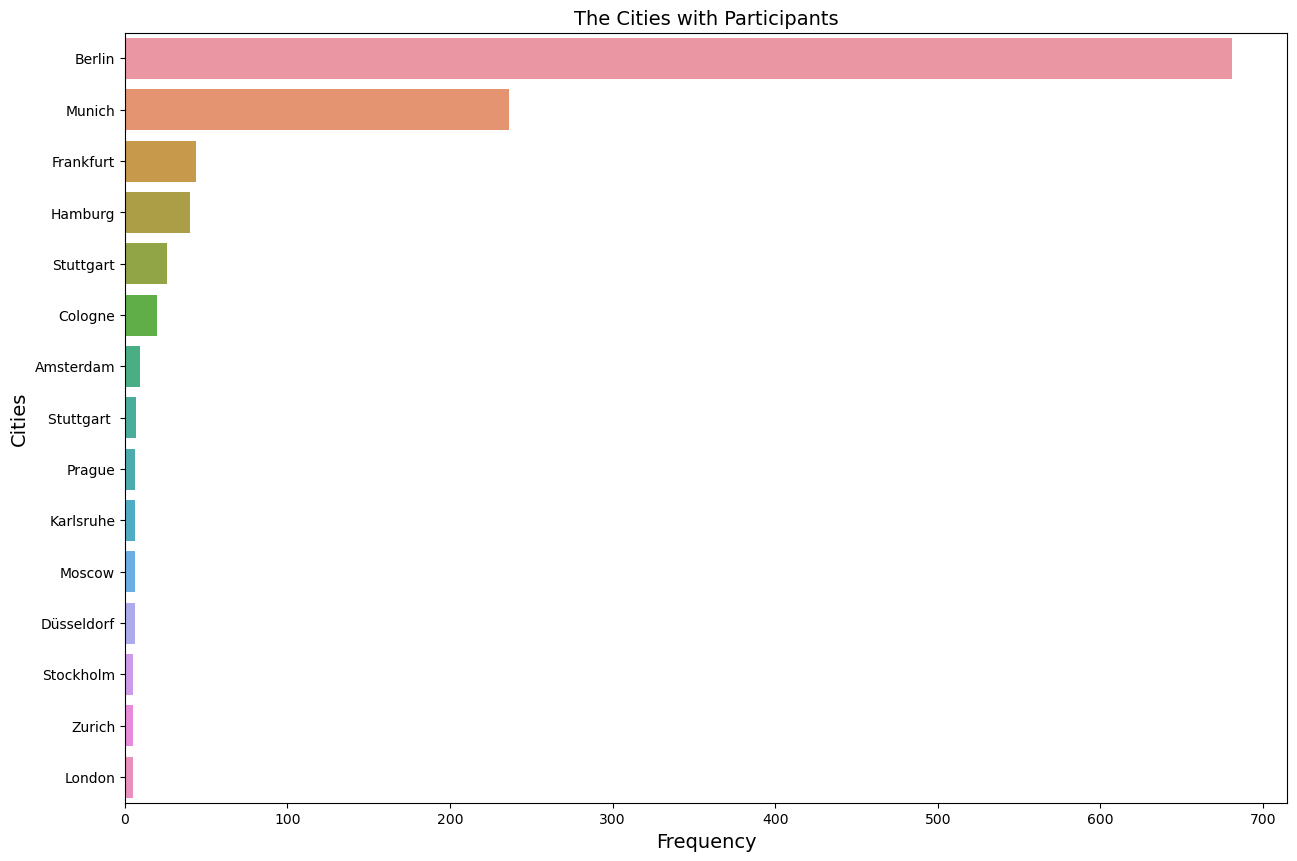

In [18]:
#we can use a barchart to  visualize the first 15 cities using seaborn
plt.figure(figsize=(15,10))
sns.barplot(data=df['City'].value_counts().head(15).reset_index(),x="City",y="index")
plt.xlabel("Frequency",fontsize=14)
plt.ylabel('Cities',fontsize=14)
plt.title("The Cities with Participants",fontsize=14)

In [19]:
#Exploring the gender column
#The unique function is used to
#return an array of unique items in an array or a pandas series. 
#The returned array of unique items is in the order they appear in the original array.
df["Gender"].unique()

array(['Male', 'Female', nan, 'Diverse'], dtype=object)

In [20]:
#Now let us dig deeper into the gender column
df["Gender"].value_counts()

Male       1049
Female      192
Diverse       2
Name: Gender, dtype: int64

In [21]:
#Plot a blox plots for the gender vs the ages.
#First we replace the nan data type with "Not Indicated."
df["Gender"]=df["Gender"].fillna(value="Not Indicated")
df["Gender"].unique()
df["Gender"].value_counts()

Male             1049
Female            192
Not Indicated      10
Diverse             2
Name: Gender, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

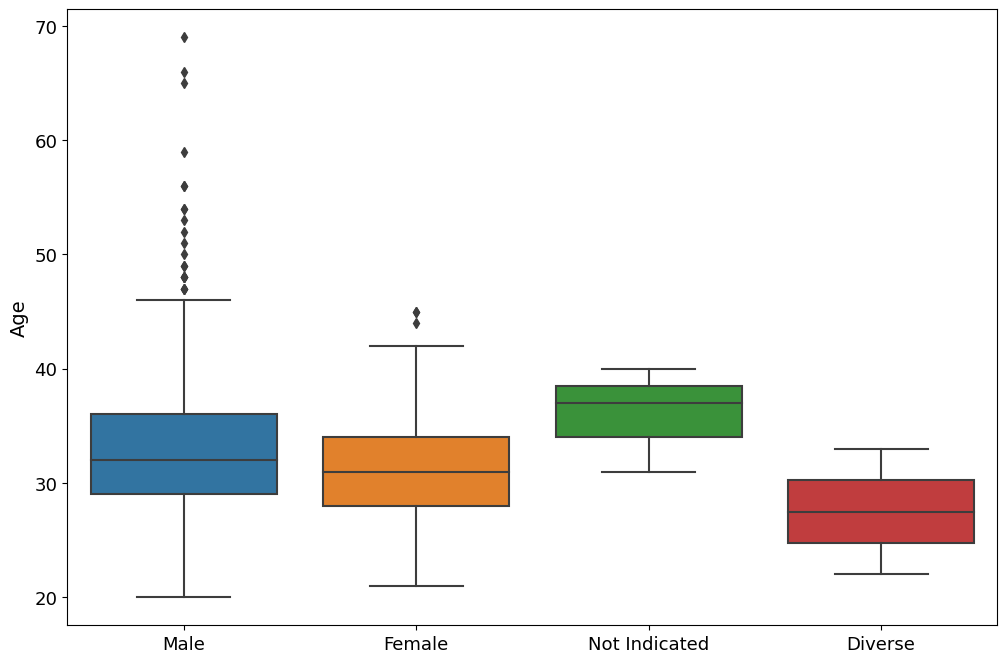

In [22]:
#Plot the boxplots.
# Plotting the Boxplots
plt.figure(figsize=(12,8))
sns.boxplot(x='Gender',y='Age',data=df)
plt.xticks(fontsize=13)
plt.xlabel("")
plt.yticks(fontsize=13)
plt.ylabel("Age",fontsize=14)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

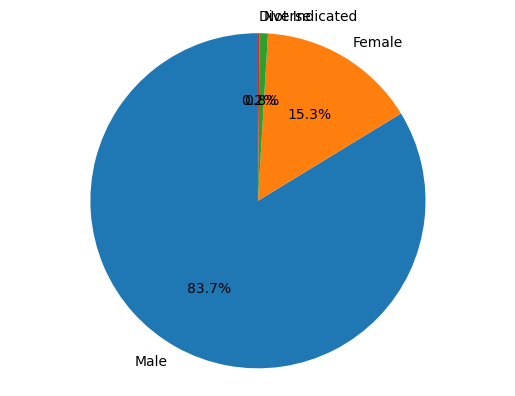

<IPython.core.display.Javascript object>

In [23]:
#Lets create a pie chart using seaborn
#The pie chart is a nice representation of the distribution of genders across the employment field.


# create a pie chart of gender distribution
fig, ax = plt.subplots()
counts = df['Gender'].value_counts()
labels = counts.index
ax.pie(x=counts, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.show()
# display the chart

plt.show()


In [25]:
#Getting into the position column to explore the feature in it
df['Position ']
df.rename(columns={'Position ':'Position'},inplace=True) #Clean "Position " to "Position" Removing the gap
df['Position'].unique()

array(['Software Engineer', 'Backend Developer', 'Frontend Developer',
       'DevOps', 'Data Engineer', 'Designer (UI/UX)', 'Product Manager',
       'Mobile Developer', 'Software Architect', 'Team Lead',
       'Test manager', 'QA Engineer', 'Data Scientist',
       'Hardware Engineer', 'Engineering Manager', 'Analytics engineer',
       'Localization producer', 'Reporting Engineer', 'Account Managet',
       'agile master ', 'ML Engineer', 'Solution Architect',
       'BI Consultant', 'Fullstack Developer', nan, 'Cloud Architect',
       'System Administrator', 'Project Manager', 'Network Engineer ',
       'VP Engineering', 'Agile Coach', 'Data Science Manager',
       'Scrum Master', 'Firmware Engineer', 'Solutions Architect',
       'Data Center Manager', 'C/C++/Java developer', 'DevOps Manager',
       'Tech Lead', 'Network Administrator', 'Security Manager',
       'Consultant Data Analytics', 'BI IT Consultant',
       'Graphic Designer', 'iOS Developer', 'Banker', 'Cloud Engi

In [26]:
#Find the number of specific unique elements in the Position column
df['Position'].nunique() #148 Positions.

148

In [27]:
#Count of the First 30 Positions
df['Position'].value_counts().head(30)

Software Engineer             387
Backend Developer             174
Data Scientist                110
Frontend Developer             89
QA Engineer                    71
DevOps                         57
Mobile Developer               53
ML Engineer                    42
Product Manager                39
Data Engineer                  25
Designer (UI/UX)               16
Engineering Manager            10
Data Analyst                    8
CTO                             5
SRE                             4
Fullstack Developer             4
Project Manager                 4
Software Architect              4
Team Lead                       3
Hardware Engineer               3
Consultant                      3
Business Analyst                3
Product Analyst                 2
IT Manager                      2
Security Engineer               2
Head of Engineering             2
Solutions Architect             2
Data Analyst                    2
Support Engineer                2
computer visio

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

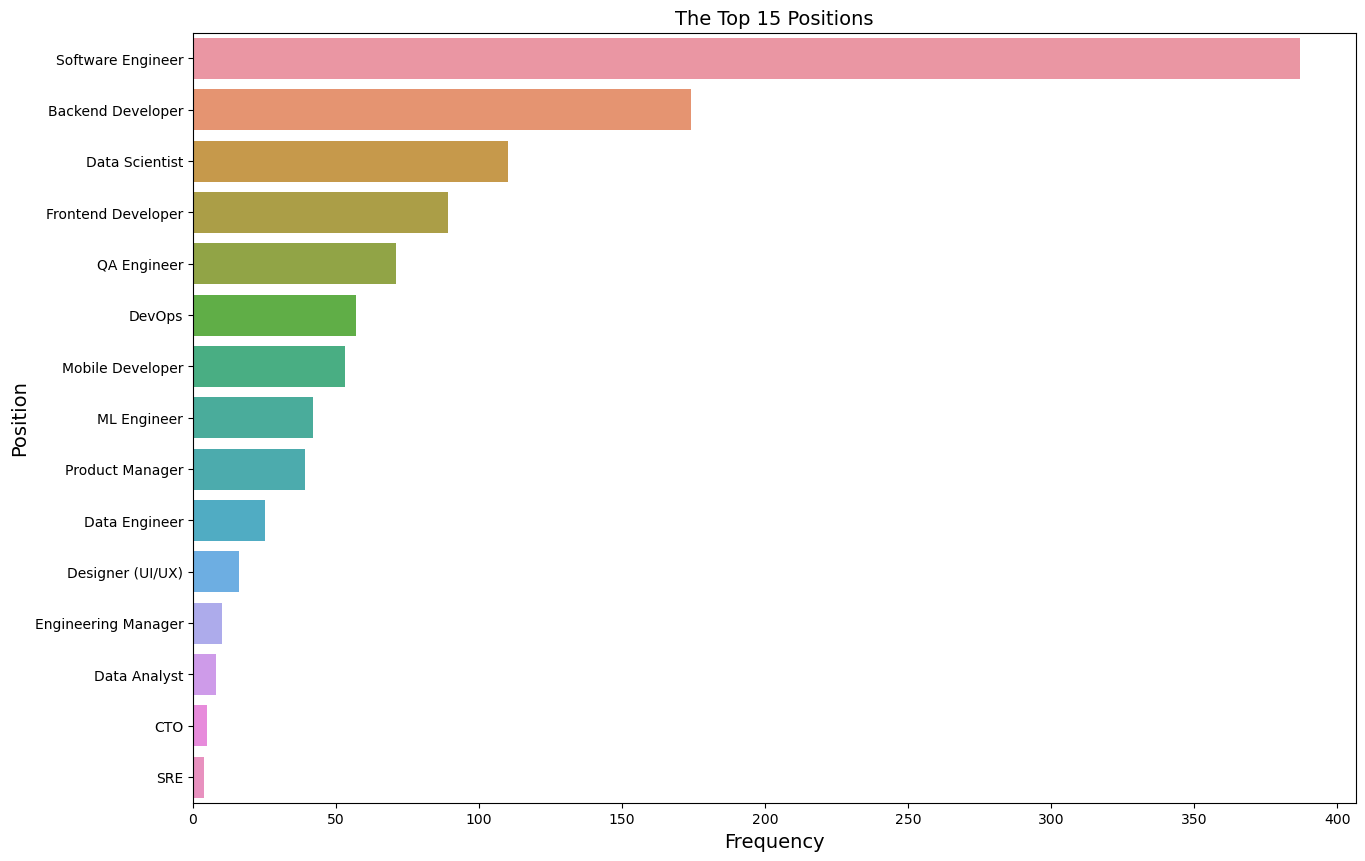

In [28]:
#lets Visualize the First 15 Positions to see the distribution
plt.figure(figsize=(15,10))
sns.barplot(data=df['Position'].value_counts().head(15).reset_index(),x="Position",y="index")
plt.xlabel("Frequency",fontsize=14)
plt.ylabel('Position',fontsize=14)
plt.title("The Top 15 Positions",fontsize=14)
plt.show()

In [29]:
# Group the data by profession and calculate the average salary for each group
#salary=df['Yearly brutto salary (without bonus and stocks) in EUR']
grouped_data = df.groupby('Position')['Yearly brutto salary (without bonus and stocks) in EUR'].mean()

# Sort the groups in descending order based on the average salary
sorted_data = grouped_data.sort_values(ascending=False)

# Print the top highest earning profession
print(sorted_data.index[:10])

Index(['ML Engineer', 'Freelance AI lead / advisor', 'Manager',
       'Software Sales', 'ERP Consultant', 'Project manager', 'Tech Leader',
       'Senior Program Manager', 'Architect ', 'Cloud Architect'],
      dtype='object', name='Position')


Index(['ML Engineer', 'Freelance AI lead / advisor', 'Manager',
       'Software Sales', 'ERP Consultant', 'Project manager', 'Tech Leader',
       'Senior Program Manager', 'Architect ', 'Cloud Architect'],
      dtype='object', name='Position')


<AxesSubplot:xlabel='Position'>

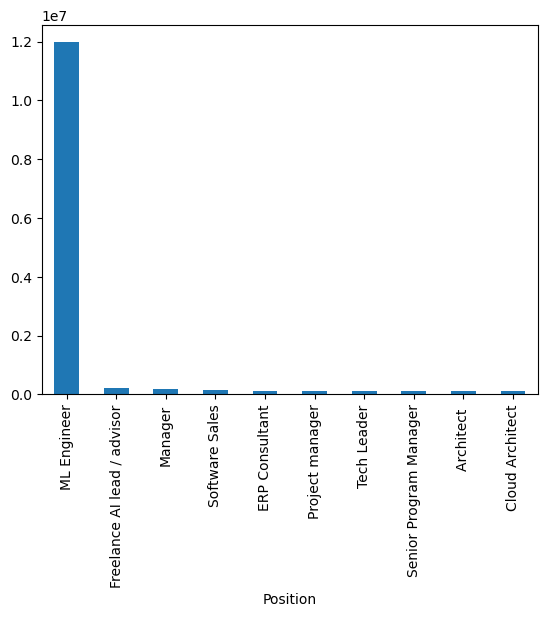

In [30]:
# Group the data by profession and calculate the average salary for each group
#salary=df['Yearly brutto salary (without bonus and stocks) in EUR']
grouped_data = df.groupby('Position')['Yearly brutto salary (without bonus and stocks) in EUR'].mean()

# Sort the groups in descending order based on the average salary
sorted_data = grouped_data.sort_values(ascending=False)

# Print the top highest earning profession
print(sorted_data.index[:10])
sorted_data[:10].plot(kind="bar") #The amount paid to The Machine Learning engineer looks ridiculouslly odd

In [52]:
#We do some data cleaning on the ridiculously put salaries
# Convert column to numeric data type
df['Annual bonus+stocks one year ago. Only answer if staying in same country'] = pd.to_numeric(df['Annual bonus+stocks one year ago. Only answer if staying in same country'], errors='coerce')

# Drop rows where the value is greater than 500,000
df = df.drop(df[df['Annual bonus+stocks one year ago. Only answer if staying in same country'] > 500000].index)


Top 10 highest earning professions:
Position
Freelance AI lead / advisor    200000.0
Manager                        180000.0
Software Sales                 150000.0
Project manager                130000.0
Tech Leader                    130000.0
ERP Consultant                 130000.0
Senior Program Manager         123600.0
Cloud Architect                120000.0
Architect                      120000.0
Software Architect             119500.0
Name: Yearly brutto salary (without bonus and stocks) in EUR, dtype: float64


<AxesSubplot:xlabel='Position'>

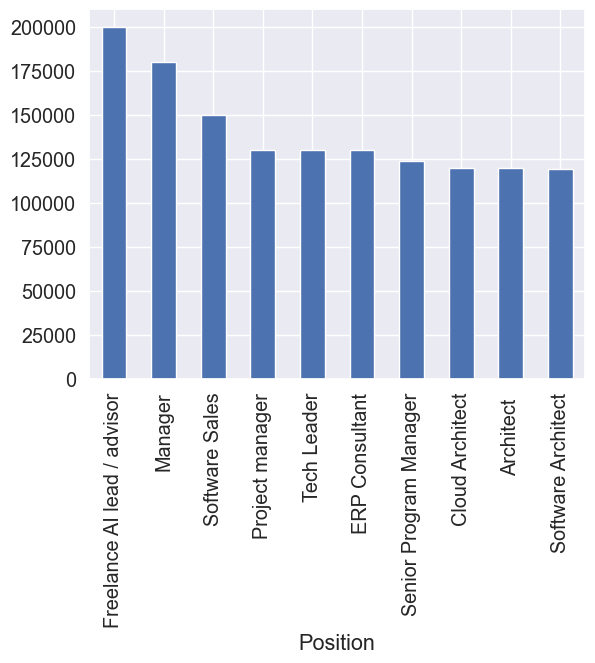

In [59]:

grouped_data = df.groupby('Position')['Yearly brutto salary (without bonus and stocks) in EUR'].mean()

# Sort the groups in descending order based on the average salary
sorted_data = grouped_data.sort_values(ascending=False)
# Print the top highest earning professions
print("Top 10 highest earning professions:")
print(sorted_data[:10])

# Plot the top ten highest Earning proffession
sorted_data[:10].plot(kind="bar")

In [50]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position',
       'Total years of experience', 'Seniority level',
       'Your main technology / programming language',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Main language at work', 'Company size',
       'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'],
      dtype='object')